# Исследование сервиса аренды самокатов GoFast.

**Описание проекта:**

У сервиса аренды самокатов GoFast есть мобильное приложение. Сервисом можно пользоваться:
1. без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2. с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

______

**Цели исследования:**

Необходимо проанализировать данные о пользователях, поездках и подписках и проверить 3 гипотезы, которые могут помочь бизнесу вырасти:
- *Гипотеза №1:* У пользователей с подпиской продолжительность одной поездки в среднем дольше, чем у пользователей без подписки.
- *Гипотеза №2:* Пользователи с подпиской в среднем проезжают не больше 3130 метров (оптимальное расстояние с точки зрения износа самоката). 
- *Гипотеза №3:* Пользователи с подпиской приносят по месяцам компании больше денег, чем пользователи без подписки. 
______

**Данные для анализа:**

3 файла (users_go.csv, rides_go.csv, subscriptions_go.csv):
1. Пользователи: информация о пользователях, их возрасте, городе и типе подписки.
2. Поездки: данные о поездках, включая расстояние, продолжительность и дату.
3. Подписки: условия подписок, включая стоимость минуты поездки, стоимость старта и абонентскую плату.

______

**План работы:**
1. Загрузка данных: чтение и первичный осмотр данных.


2. Предобработка данных: приведение типов данных, создание новых столбцов, обработка пропусков, дубликатов и аномальных значений.


3. Исследовательский анализ данных: описание и визуализация информации о пользователях и поездках.


4. Объединение данных: объединение данных о пользователях, поездках и подписках для дальнейшего анализа.


5. Подсчёт выручки: расчёт выручки на основе условий подписки.


6. Проверка гипотез: проверка гипотез, чтобы найти точки роста для бизнеса.

### Загрузка данных

**1.1. Импортируем все библиотеки, необходимые для анализа.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

**1.2. Считываем данные из csv-файлов в датафреймы и сохраняем в переменные users, rides, subscriptions.**

In [7]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

**1.3. Выведем первые строки каждого набора данных.**

In [9]:
display(users.head())
print()
display(rides.head())
print()
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**1.4. Выведем основную информацию о датафрейме с помощью метода info().**

In [11]:
print(users.info())
print()
print(rides.info())
print()
print(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 column

**Вывод:** 

Считала данные из csv-файлов и сохранила в датафреймы users, rides, subscriptions:
1. Таблица *users* содержит информацию о пользователях, включая их уникальные идентификаторы, имена, возраст, города и типы подписок. Размер таблицы: *1565 строк, 5 столбцов*.
2. Таблица *rides* содержит данные о поездках, включая уникальные идентификаторы пользователей, расстояния, продолжительность сессий и даты поездок. Размер таблицы: *18068 строк, 4 столбца*.
3. Таблица *subscriptions* включает информацию о различных типах подписок, стоимости одной минуты поездки, стоимости начала поездки и ежемесячной плате. Размер таблицы: *2 строки, 4 столбца*.

### Предобработка данных

**2.1. Приведем столбец date к типу даты pandas.**

In [15]:
rides['date'] = pd.to_datetime(rides['date'], format=('%Y-%m-%d'))
print(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None


**2.2. Создадим новый столбец с номером месяца на основе столбца date.**

Проверим за какой период у нас данные, чтобы данные за несколько лет не "склеились" при агрегации по месяцам.

In [18]:
months_check = pd.pivot_table(rides, index=rides['date'].dt.year, aggfunc='size')
months_check

date
2021    18068
dtype: int64

In [19]:
# rides['month'] = pd.DatetimeIndex(rides['date']).month
rides['month'] = rides['date'].dt.month
display(rides.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**2.3. Проверим данные на наличие пропущенных значений и явных дубликатов.**

In [21]:
print(users.isna().sum())
print()
print(rides.isna().sum())
print()
print(subscriptions.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Пропущенных значений не обнаружено.

In [23]:
print(users.duplicated().sum())
print()
print(rides.duplicated().sum())
print()
print(subscriptions.duplicated().sum())

31

0

0


Обнаружены 31 явных дубликатов в таблице users. Выведем их на экран.

In [25]:
duplicate_users = users[users.duplicated() == True]
display(duplicate_users)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Проверяем пользователя с user_id 293. Строка полностью дублируется.

In [27]:
display(users[users['user_id'] == 293])

,user_id,name,age,city,subscription_type
292,293,Агата,26,Краснодар,ultra
1534,293,Агата,26,Краснодар,ultra


Судя по индексу строк и характеру данных 31 строка полностью повторяются. Удаляем их.

In [29]:
users = users.drop_duplicates()

print('users duplicates:', users.duplicated().sum())

users duplicates: 0


**Вывод:**
- *Приведение типов данных:* тип данных изменен в 1 столбце: date:  object -> datetime.
- *Дубликаты:* удалены неявные дубликаты в таблице users: 31 строка из 1565 строк (2%).
- *Аномальные значения:* нет.
- *Пропущенные значения:* нет.
- *Новые столбцы:* добавлен новый столбец с номером месяца на основе столбца date.

### Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

**3.1. частота встречаемости городов**

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


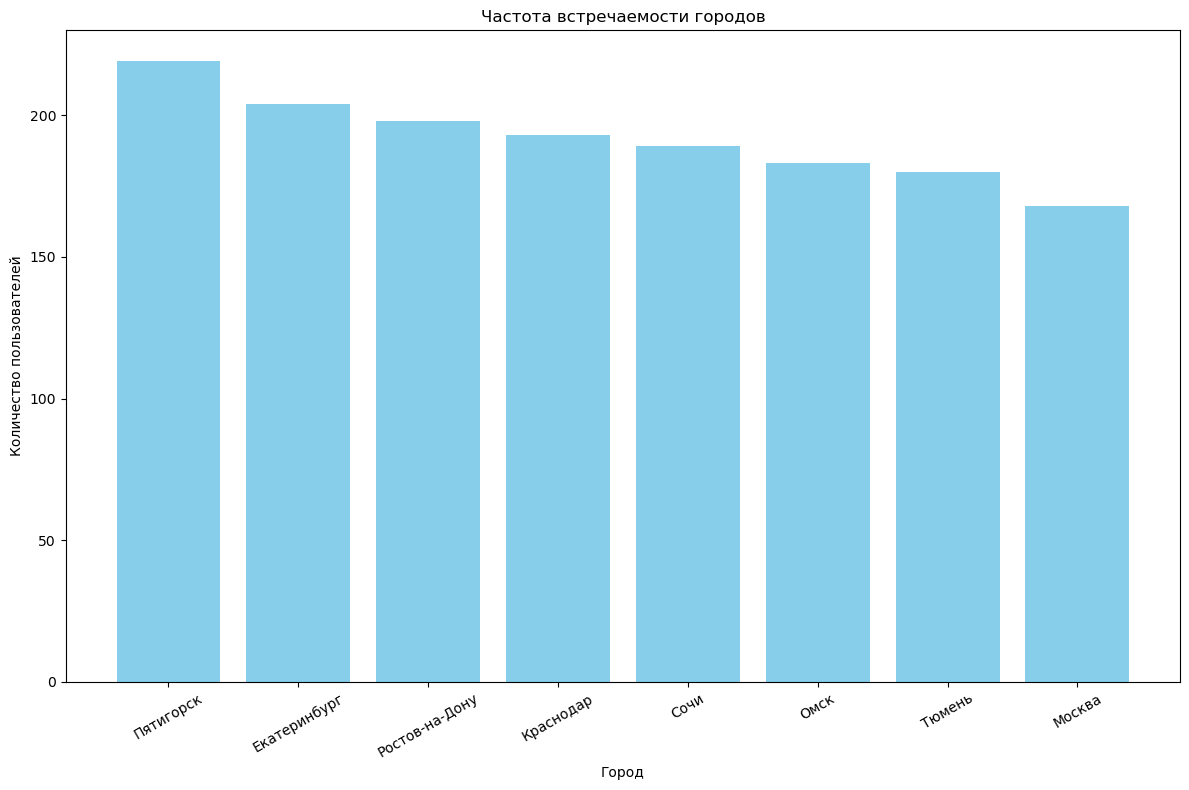

In [34]:
city_counts = users['city'].value_counts()
print(city_counts)

plt.figure(figsize=(12, 8))
plt.bar(city_counts.index, city_counts.values, color='skyblue')

plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

**Вывод:** Больше всего пользователей сервиса в Пятигорске, меньше всего в Москве.

**3.2. соотношение пользователей с подпиской и без подписки**

subscription_type
free     835
ultra    699
Name: count, dtype: int64


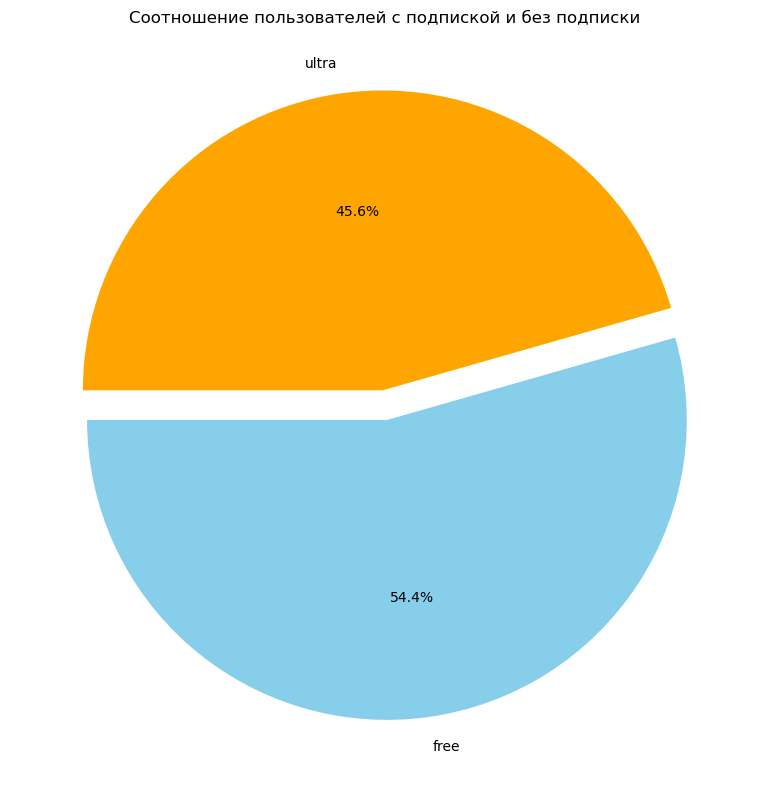

In [37]:
subscription_counts = users['subscription_type'].value_counts()
print(subscription_counts)

subscription_counts.plot(kind='pie', figsize=(12, 8), autopct='%1.1f%%', startangle=180, colors=['skyblue', 'orange'], explode=[0.05, 0.05])

plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Вывод:** Всего пользователей: 1534. Пользователи с подпиской Ultra - 699(45.6%), пользователи без подписки - 835(54.4%).

**3.3. возраст пользователей**

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


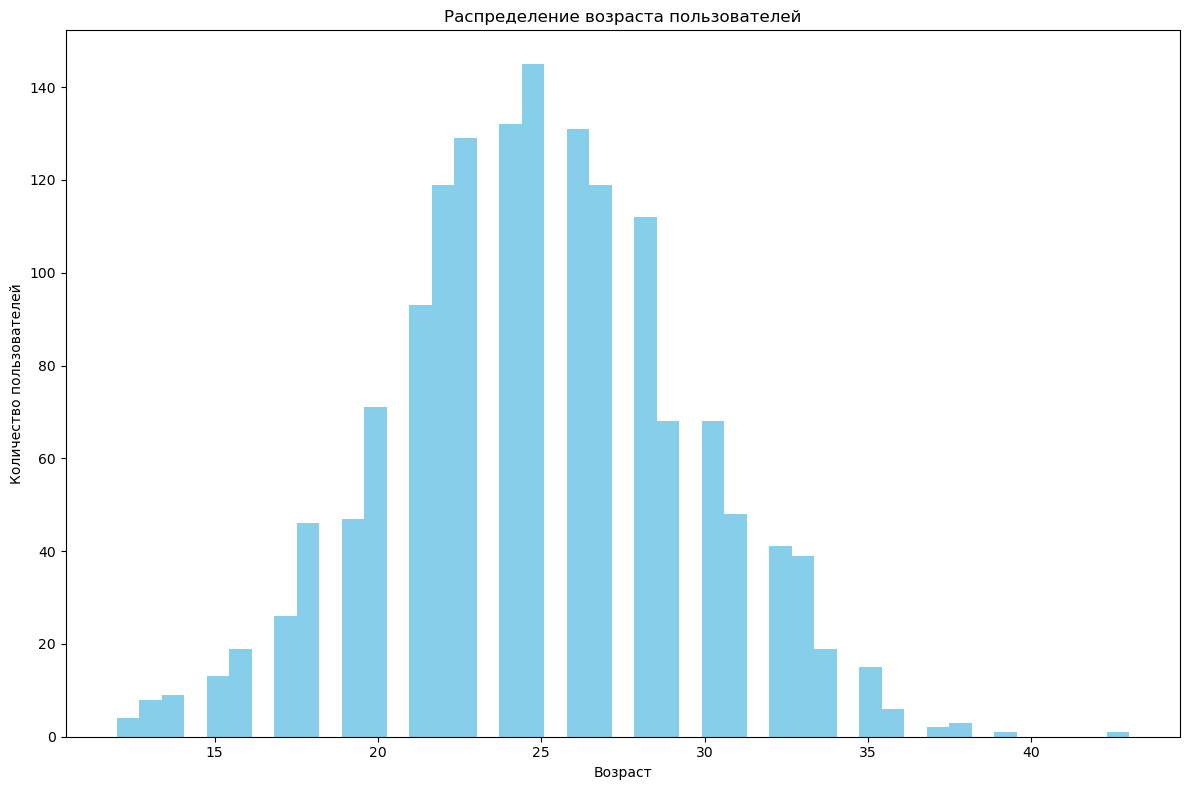

In [40]:
print(users['age'].describe())

users['age'].plot(kind='hist', figsize=(12,8), bins=45, color='skyblue')

plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.tight_layout()
plt.show()

**Вывод:** Большая часть пользователей - в возрасте от 22 до 28 лет. Средний возраст пользователя - 25 лет. Самый младший пользователь - 12 лет, самый старший - 43 года.

**3.4. расстояние, которое пользователь преодолел за одну поездку**

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


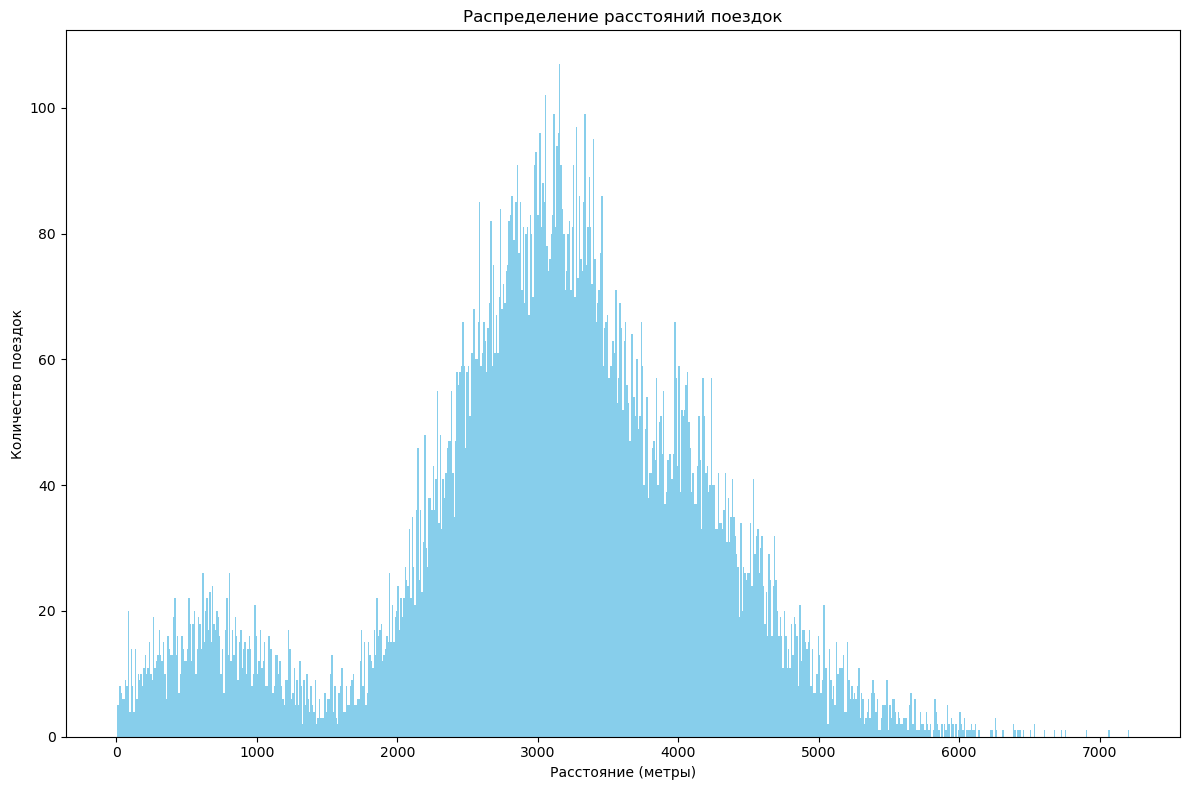

In [43]:
print(rides['distance'].describe())

rides['distance'].plot(kind='hist', figsize=(12, 8), bins=721, color='skyblue')

plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')

plt.tight_layout()
plt.show()

**Вывод:** Большинство поездок имеют расстояние от 2543 до 3776 метров. Среднее расстояние составляет 3070 метров. Самое короткое расстояние — 0.8 метра, самое длинное — 7211 метров. Гистограмма описывает бимодальное распределение.
Судя по графику поездки условно можно разделить на:
- короткие с расстоянием от 0 до 1500 м, пиком в 700 метров.
- длинные с расстоянием от 1500 до 6000 м, пиком в 3070 метров.

**3.5. продолжительность поездок**

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


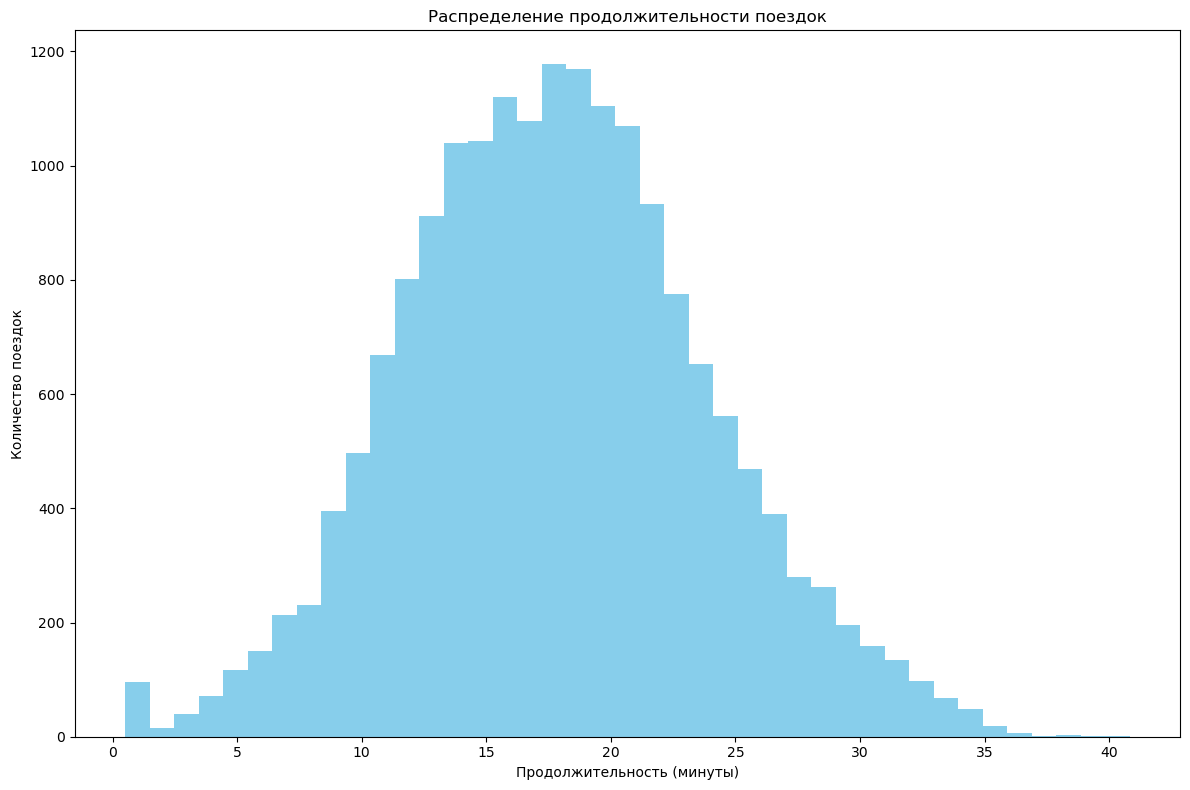

In [46]:
print(rides['duration'].describe())

rides['duration'].plot(kind='hist', figsize=(12, 8), bins=41, color='skyblue')

plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')

plt.tight_layout()
plt.show()

**Вывод:** Большинство поездок имеют продолжительность от 14 до 22 минут. Средняя продолжительность поездок - 18 минут. Самая короткая поездка — 0.5 минут, самое длинная — 41 минута. Гистограмма показывает, что распределение данных нормальное, где большинство поездок сконцентрированы вокруг среднего значения. Медиана близка к среднему значению, что указывает на симметричное распределение данных.
Есть всплеск в данных для поездок, которые меньше одного метра, видимо это тестовые поездки новых пользователей, которые только пробуют сервис. 

### Объединение данных

**4.1. Объединим данные о пользователях, поездках и подписках в один датафрейм.**

In [50]:
merged_data = users.merge(rides, on='user_id').merge(subscriptions, on='subscription_type')
display(merged_data)
print()
print(merged_data.info())
print()
print(merged_data.isna().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB
None

user_id              0


**4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:**
- **c данными о пользователях без подписки;**
- **с данными о пользователях с подпиской.**

In [52]:
subscription_data = merged_data[merged_data['subscription_type'] == 'ultra']
no_subscription_data = merged_data[merged_data['subscription_type'] == 'free']

display(subscription_data)
display(no_subscription_data)
print()
print(subscription_data.info())
print()
print(no_subscription_data.info())
print()
print(subscription_data.isna().sum())
print()
print(no_subscription_data.isna().sum())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0



<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int32         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 634.8+ KB
None

<class 'pandas.core.frame.Da

**Вывод:** 

- Объединила данные о пользователях, поездках и подписках в один датафрейм.
- Создала два датафрейма: c данными о пользователях без подписки и с данными о пользователях с подпиской.
- При объединении данных и создании отдельных датафреймов все данные сохранили целостность и полноту.

**4.3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.**

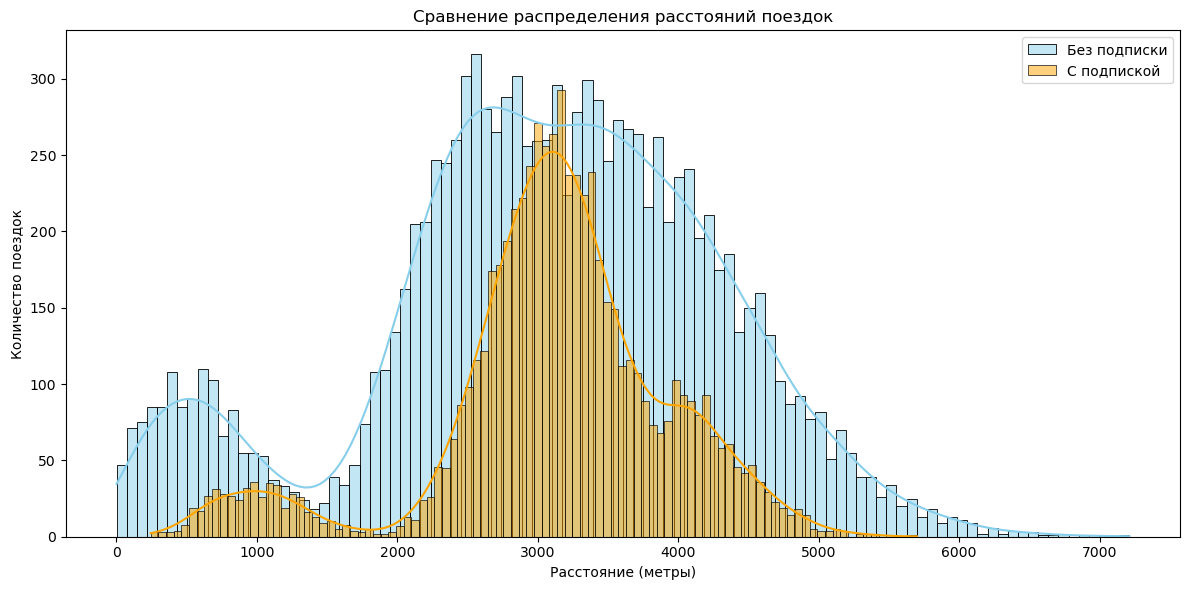

In [55]:
# Визуализация расстояния поездок
plt.figure(figsize=(12, 6))

sns.histplot(no_subscription_data['distance'], bins=100, kde=True, color='skyblue', label='Без подписки')
sns.histplot(subscription_data['distance'], bins=100, kde=True, color='orange', label='С подпиской')

plt.title('Сравнение распределения расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.legend()

plt.tight_layout()
plt.show()

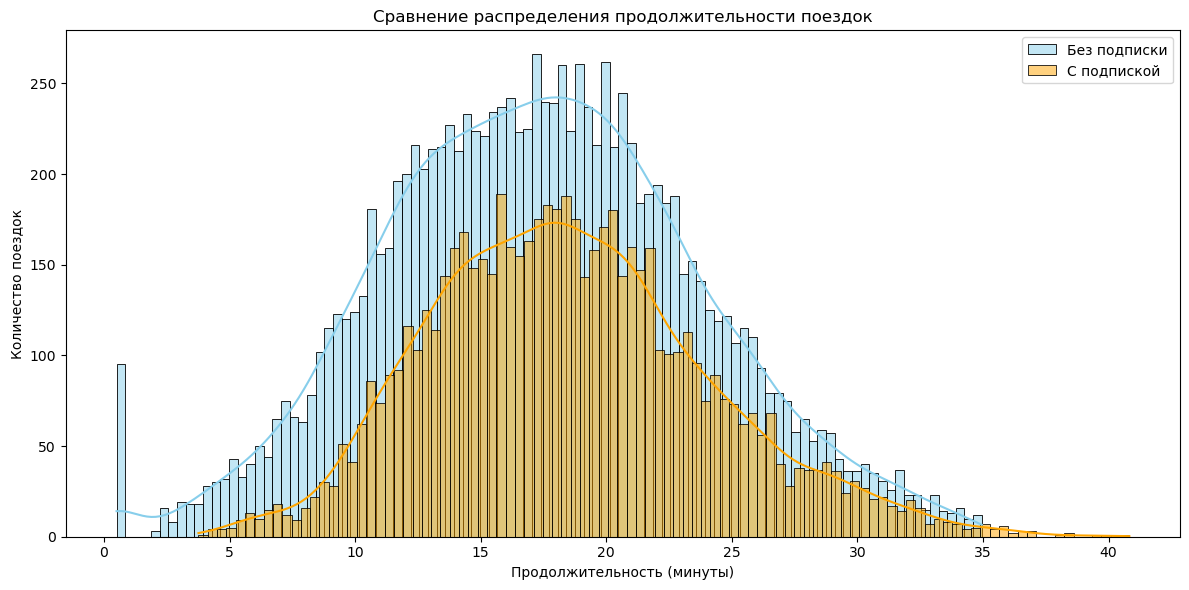

In [56]:
# Визуализация времени поездок
plt.figure(figsize=(12, 6))

sns.histplot(no_subscription_data['duration'], bins=100, kde=True, color='skyblue', label='Без подписки')
sns.histplot(subscription_data['duration'], bins=100, kde=True, color='orange', label='С подпиской')

plt.title('Сравнение распределения продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.legend()

plt.tight_layout()
plt.show()

**Вывод:** Пользователи с подпиской и без нее в целом имеют схожие модели поведения. И продолжительность, и расстояние за поездку совпадают.
У пользователей без подписки есть поездки меньше метра, видимо это тестовые поездки новых пользователей, которые только пробуют сервис.

### Подсчёт выручки

Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 преобразованы к 26.

In [60]:
merged_data['duration'] = np.ceil(merged_data['duration']).astype(int)

In [61]:
display(merged_data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


Агрегирование данных. 

In [63]:
aggregated_data = merged_data.groupby(['user_id', 'month']).agg(
    subscription_type=pd.NamedAgg(column='subscription_type', aggfunc='first'),
    minute_price=pd.NamedAgg(column='minute_price', aggfunc='first'),
    start_ride_price=pd.NamedAgg(column='start_ride_price', aggfunc='first'),
    subscription_fee=pd.NamedAgg(column='subscription_fee', aggfunc='first'),
    total_distance=pd.NamedAgg(column='distance', aggfunc='sum'),
    trip_count=pd.NamedAgg(column='distance', aggfunc='count'),
    total_duration=pd.NamedAgg(column='duration', aggfunc='sum'),
).reset_index()

display(aggregated_data)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_distance,trip_count,total_duration
0,1,1,ultra,6,0,199,7027.511294,2,42
1,1,4,ultra,6,0,199,754.159807,1,7
2,1,8,ultra,6,0,199,6723.470560,2,46
3,1,10,ultra,6,0,199,5809.911100,2,32
4,1,11,ultra,6,0,199,7003.499363,3,56
...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26
11327,1534,8,free,8,50,0,7622.453034,2,48
11328,1534,9,free,8,50,0,4928.173852,1,23
11329,1534,11,free,8,50,0,13350.015305,4,78


**Помесячная выручка считается по формуле: (стоимость старта поездки × количество поездок) + (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + стоимость подписки.**

In [65]:
aggregated_data['monthly_revenue'] = (aggregated_data['start_ride_price']*aggregated_data['trip_count']) + (aggregated_data['minute_price']*aggregated_data['total_duration']) + aggregated_data['subscription_fee']

display(aggregated_data)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_distance,trip_count,total_duration,monthly_revenue
0,1,1,ultra,6,0,199,7027.511294,2,42,451
1,1,4,ultra,6,0,199,754.159807,1,7,241
2,1,8,ultra,6,0,199,6723.470560,2,46,475
3,1,10,ultra,6,0,199,5809.911100,2,32,391
4,1,11,ultra,6,0,199,7003.499363,3,56,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,8,50,0,3409.468534,2,26,308
11327,1534,8,free,8,50,0,7622.453034,2,48,484
11328,1534,9,free,8,50,0,4928.173852,1,23,234
11329,1534,11,free,8,50,0,13350.015305,4,78,824


In [66]:
# Код ревьюера
aggregated_data.groupby('subscription_type')['monthly_revenue'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_revenue, dtype: float64

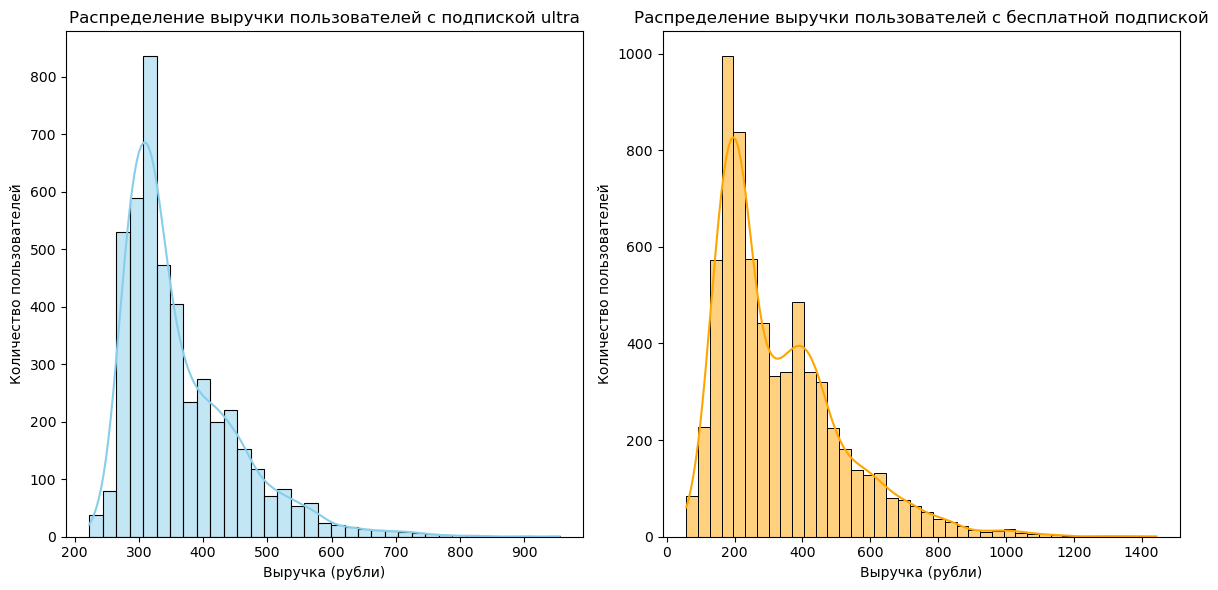

In [67]:
# Визуализация выручки пользователей
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(aggregated_data[aggregated_data['subscription_type']=='ultra']['monthly_revenue'], bins=35, kde=True, color='skyblue')
plt.title('Распределение выручки пользователей с подпиской ultra')
plt.xlabel('Выручка (рубли)')
plt.ylabel('Количество пользователей')

plt.subplot(1, 2, 2)
sns.histplot(aggregated_data[aggregated_data['subscription_type']=='free']['monthly_revenue'], bins=40, kde=True, color='orange')
plt.title('Распределение выручки пользователей с бесплатной подпиской')
plt.xlabel('Выручка (рубли)')
plt.ylabel('Количество пользователей')

plt.tight_layout()
plt.show()

In [68]:
revenue_data = aggregated_data.groupby('subscription_type').agg(
    users=pd.NamedAgg(column='user_id', aggfunc='count'),
    total_revenue=pd.NamedAgg(column='monthly_revenue', aggfunc='sum')
).reset_index()

revenue_data['revenue_per_user'] = revenue_data['total_revenue'] / revenue_data['users']

display(revenue_data)

,subscription_type,users,total_revenue,revenue_per_user
0,free,6798,2234104,328.641365
1,ultra,4533,1644537,362.792191


**Вывод:** 

    - количество пользователей без подписки почти в 1.5 раза больше, чем пользователей с подпиской.
    - общая выручка от пользователей без подписки (2 234 104 руб) выше, чем от пользователей с подпиской (1 644 537 руб). 
    - средняя выручка на одного пользователя с подпиской (362 руб) выше, чем у пользователей с бесплатной подпиской (328 руб). 

### Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

**Нулевая гипотеза:** Пользователи с подпиской и без нее тратят на поездки одинаковое количество времени.

**Альтернативная гипотеза:** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [73]:
# задаём уровень значимости
alpha = 0.05

# время на поездки пользователей с подпиской
ultra_duration = merged_data[merged_data['subscription_type']=='ultra']['duration']

# время на поездки пользователей без подписки
free_duration = merged_data[merged_data['subscription_type']=='free']['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')

# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской и без нее тратят на поездки одинаковое количество времени.')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.


In [74]:
print(merged_data[merged_data['subscription_type']=='ultra']['duration'].describe())
print()
print(merged_data[merged_data['subscription_type']=='free']['duration'].describe())

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


**Вывод:** Пользователи с подпиской тратят больше времени на поездки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу.

**Нулевая гипотеза:** Пользователи с подпиской за одну поездку проезжают ровно 3130 метров.

**Альтернативная гипотеза:** Пользователи с подпиской за одну поездку проезжают больше 3130 метров.

In [78]:
alpha = 0.05

interested_value = 3130

ultra_distance = merged_data[merged_data['subscription_type']=='ultra']['distance']

results = st.ttest_1samp(ultra_distance, interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу: пользователи с подпиской за одну поездку проезжают значимо больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской за одну поездку проезжают не больше 3130 метров')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской за одну поездку проезжают не больше 3130 метров


In [79]:
merged_data[merged_data['subscription_type']=='ultra']['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

**Вывод:** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное расстояние с точки зрения износа самоката). 
Это означает, что пользователи с подпиской не способствуют повышенному износу самокатов, частота и степень износа остаются в пределах нормальных эксплуатационных условий.

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Нулевая гипотеза:** Помесячные выручки от пользователей с подпиской и без нее одинаковые.

**Альтернативная гипотеза:** Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [83]:
alpha = 0.05

# время на поездки пользователей с подпиской
ultra_monthly_revenue = aggregated_data[aggregated_data['subscription_type']=='ultra']['monthly_revenue']

# время на поездки пользователей без подписки
free_monthly_revenue = aggregated_data[aggregated_data['subscription_type']=='free']['monthly_revenue']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_monthly_revenue, free_monthly_revenue, alternative='greater')

# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: помесячные выручки от пользователей с подпиской и без нее одинаковые.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


In [84]:
print(aggregated_data[aggregated_data['subscription_type']=='ultra']['monthly_revenue'].describe())
print()
print(aggregated_data[aggregated_data['subscription_type']=='free']['monthly_revenue'].describe())

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: monthly_revenue, dtype: float64

count    6798.000000
mean      328.641365
std       183.868330
min        58.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: monthly_revenue, dtype: float64


**Вывод:** Выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизится. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Вывод:** Поскольку у нас есть две выборки, до и после обновления, и они зависимы, то подойдет *односторонняя* гипотеза о равенстве средних для зависимых (парных) выборок: scipy.stats.ttest_rel().
При статистической значимости равной 0.05:
- если p-value меньше 0.05, мы отклоняем нулевую гипотезу и заключаем, что количество обращений снизилось.
- если p-value больше или равно 0.05, у нас недостаточно доказательств, чтобы утверждать, что количество обращений снизилось.

### Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Эта задача описывается биномиальным распределением. Пусть N — это количество разосланных промокодов, p=0.1 — вероятность того, что пользователь продлит подписку, и k=100 — минимальное количество продлений, чтобы выполнить план.

Нам нужно найти такое минимальное N, чтобы вероятность того, что количество продлений X будет меньше 100, была равна 5%: P(X<100)≈0.05.

Для этого воспользуемся функцией распределения биномиального распределения (cdf).

Сначала создадим функцию, которая находит минимальное N, удовлетворяющее данному условию.

In [91]:
p = 0.10  # вероятность продления подписки
k = 100   # необходимое количество успешных продлений
alpha = 0.05  # вероятность не выполнить план

def find_min_N(p, k, alpha):
    n = k  # Начнем с N, равного k
    while True:
        prob = st.binom.cdf(k - 1, n, p)  # P(X < k) для биномиального распределения
        if prob <= alpha:
            return n
        n += 1

n_min = find_min_N(p, k, alpha)
n_min

1161

**Вывод:** Отделу маркетинга необходимо разослать промокоды 1161 клиентам, чтобы после акции достичь 100 продлений подписок.

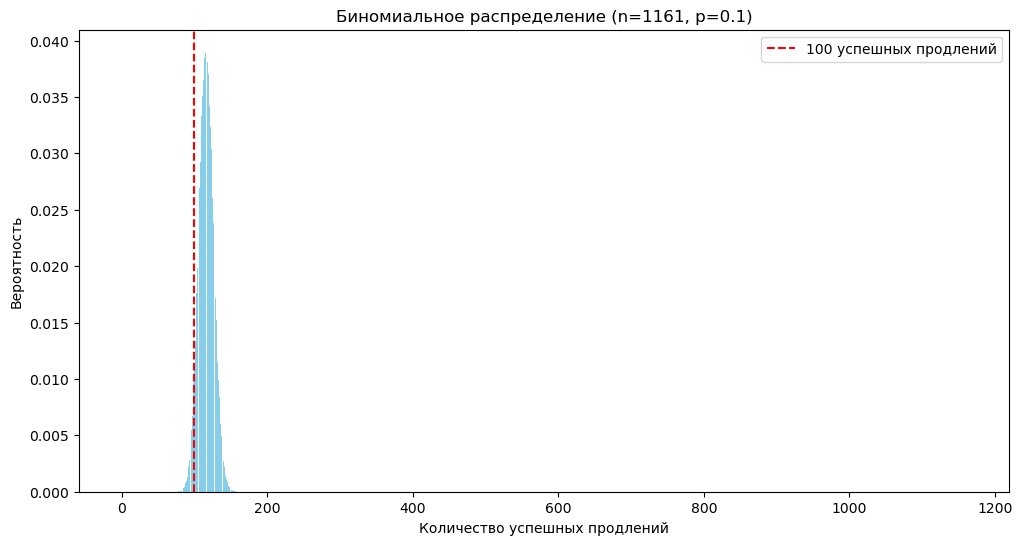

In [93]:
# Биномиальное распределение
x = np.arange(0, n_min + 1)
y = st.binom.pmf(x, n_min, p)

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

plt.axvline(k, color='red', linestyle='--', label=f'{k} успешных продлений')
plt.title(f'Биномиальное распределение (n={n_min}, p={p})')
plt.xlabel('Количество успешных продлений')
plt.ylabel('Вероятность')
plt.legend()

plt.show()

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [95]:
n = 1000000 # количество отправленных уведомлений 
p = 0.4     # вероятность открытия уведомления 

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399500
result = distr.cdf(399500)
print(result)

0.15371708296369768


Построим гистограмму и аппроксимацию нормальным распределением.

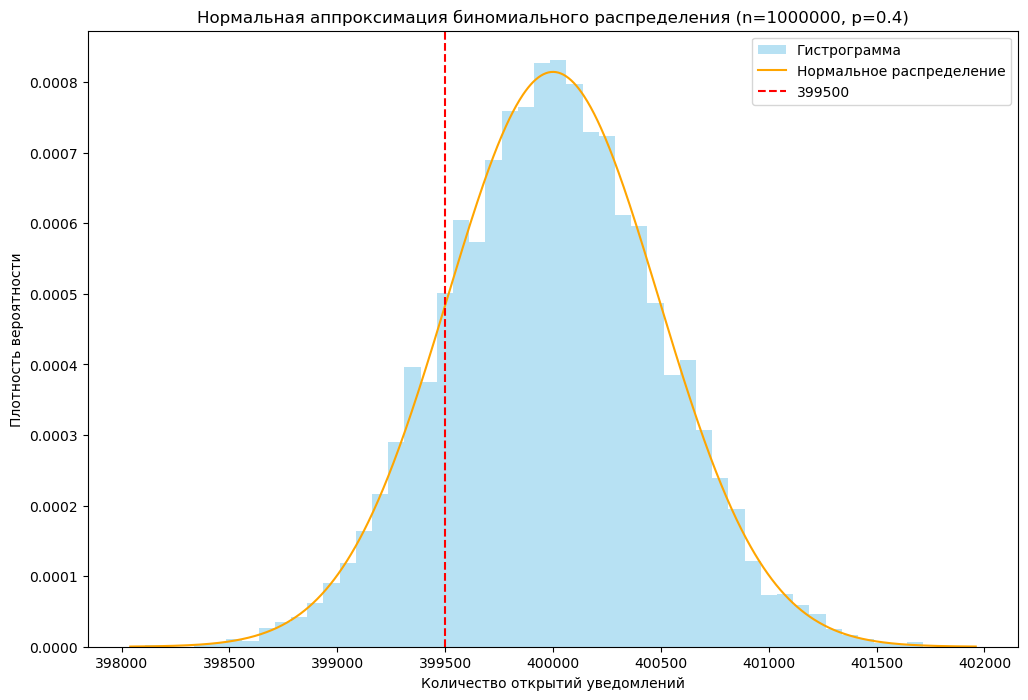

In [97]:
sample_binom = np.random.binomial(n, p, 10000)

plt.figure(figsize=(12, 8))
plt.hist(sample_binom, bins=50, density=True, alpha=0.6, color='skyblue', label='Гистрограмма')

# Плотность нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = st.norm.pdf(x, mu, sigma)
plt.plot(x, y, color='orange', label='Нормальное распределение')

plt.axvline(399500, color='red', linestyle='--', label='399500')
plt.title(f'Нормальная аппроксимация биномиального распределения (n={n}, p={p})')
plt.xlabel('Количество открытий уведомлений')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

**Вывод:** Вероятность того, что после отправки 1 000 000 уведомлений,  количество пользователей, не открывших уведомление, составит не более 399 500 человек, - примерно 15%.

### Выводы

**1. Общая информация о данных:**

1. Таблица *users* содержит информацию о пользователях, включая их уникальные идентификаторы, имена, возраст, города и типы подписок. Размер таблицы: *1565 строк, 5 столбцов*.
2. Таблица *rides* содержит данные о поездках, включая уникальные идентификаторы пользователей, расстояния, продолжительность сессий и даты поездок. Размер таблицы: *18068 строк, 4 столбца*.
3. Таблица *subscriptions* включает информацию о различных типах подписок, стоимости одной минуты поездки, стоимости начала поездки и ежемесячной плате. Размер таблицы: *2 строки, 4 столбца*.

**2. Предобработка данных:**

- *Пропущенные значения:* нет.
- *Типы данных:* тип данных изменен в 1 столбце: date:  object -> datetime.
- *Дубликаты:* удалены неявные дубликаты в таблице users: 31 строка из 1565 строк (2%).
- *Аномальные значения:* нет.
- *Новые параметры:* добавлен новый столбец с номером месяца на основе столбца date.

**3. Исследовательский анализ данных:**

1. *Частота встречаемости городов:* больше всего пользователей сервиса в Пятигорске, меньше всего в Москве..
2. *Соотношение пользователей с подпиской и без подписки:* всего пользоватлей: 1534. Пользователи с подпиской Ultra - 699(45.6%), пользователи без подписки - 835(54.4%).
3. *Возраст пользователей:* большая часть пользователей - в возрасте от 22 до 28 лет. Средний возраст пользователя - 25 лет. Самый младший пользователь - 12 лет, самый старший - 43 года.
4. *Расстояние, которое пользователь преодолел за одну поездку:* большинство поездок имеют расстояние от 2543 до 3776 метров. Среднее расстояние составляет 3070 метров. Самое короткое расстояние — 0.8 метра, самое длинное — 7211 метров. Данные распределены нормально, большинство поездок сконцентрированы вокруг среднего значения.
5. *Продолжительность поездок:* большинство поездок имеют продолжительность от 14 до 22 минут. Средняя продолжительность поездок - 18 минут. Самая короткая поездка — 0.5 минут, самое длинная — 41 минута. Данные распределены норомально, большинство поездок сконцентрированы вокруг среднего значения.

Далее все данные были объединены в единую таблицу для проверки гипотез, выдвинутых продакт-менеджерами сервиса.

**4. Подсчёт выручки:** 
- количество пользователей без подписки почти в 1.5 раза больше, чем пользователей с подпиской.
- общая выручка от пользователей без подписки (2 234 104 руб) выше, чем от пользователей с подпиской (1 644 537 руб). 
- средняя выручка на одного пользователя с подпиской (362 руб) выше, чем у пользователей с бесплатной подпиской (328 руб). 

**5. Проверка гипотез:**

Все три гипотезы, выдвинутые продакт-менеджерами, оказались верными. 

1. *Гипотеза №1:* У пользователей с подпиской продолжительность одной поездки в среднем дольше, чем у пользователей без подписки. Гипотеза подтвердилась.
2. *Гипотеза №2:* Пользователи с подпиской в среднем проезжают не больше 3130 метров (оптимальное расстояние с точки зрения износа самоката). Гипотеза подтвердилась.
3. *Гипотеза №3:* Пользователи с подпиской приносят по месяцам компании больше денег, чем пользователи без подписки. Гипотеза подтвердилась.